In [11]:
''' required import '''

from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2

In [ ]:
''' book spine processing '''

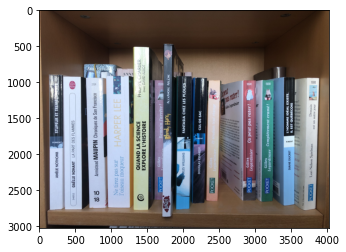

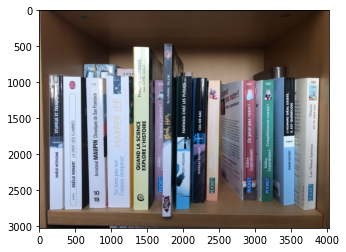

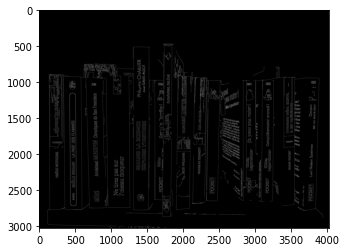

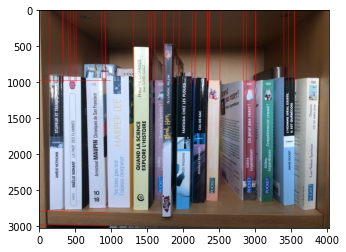

In [13]:
''' row processing '''

# image load
img = Image.open('../image/img15.jpg')
plt.imshow(img)
plt.show()

"""
img : image of a row
isNoiseless : if gaussian blur was applied = True / else = False
"""
def rowProcessing(img, isNoiseless):
    
    # type conversion
    img = np.array(img)
    
    # noise reducer
    if (not isNoiseless):
        img = cv2.GaussianBlur(img, (7, 7), 0)
        plt.imshow(img)
        plt.show()

    # canny filter
    edges = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(edges, 50, 150)
    plt.imshow(edges, cmap='gray')
    plt.show()  


    # hough transform
    treshold = 300
    lines = cv2.HoughLines(edges, 1, np.pi/180, treshold)
    
    for line in lines:
        for rho,theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
        
            img = cv2.line(img, (x1,y1), (x2,y2), (255,0,0), 3)

    plt.imshow(img)
    plt.show()


rowProcessing(img, False)

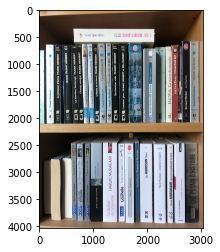

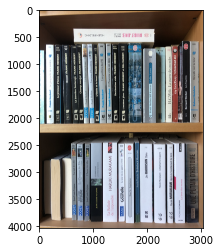

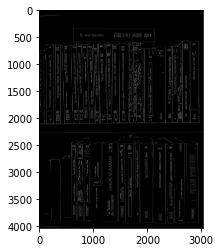

<ipython-input-14-118f8db3cf63>:29: RuntimeWarning: overflow encountered in ubyte_scalars
  lineMerge[a,i] = edges[a-2,i] + edges[a-1,i] + edges[a,i]


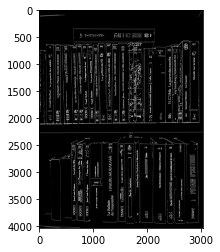

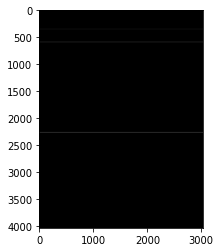

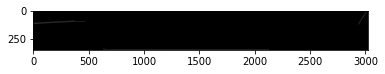

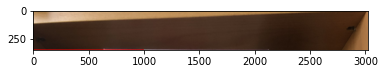

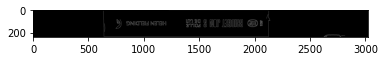

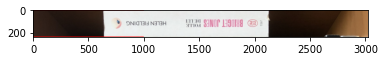

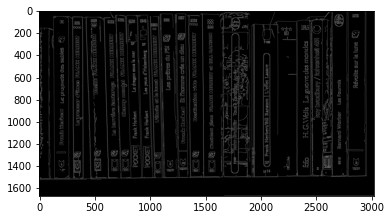

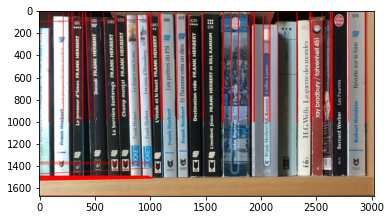

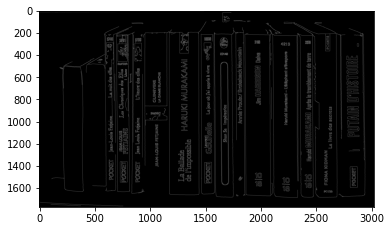

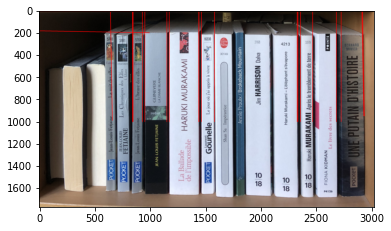

In [14]:
''' bookshelf processing '''

# image load
img = Image.open('../image/img16.jpg')
plt.imshow(img)
plt.show()


def bookshelfProcessing(img):
    
    width, height = img.size
    img = np.array(img)
    
    # noise reducer
    img = cv2.GaussianBlur(img, (7, 7), 0)
    plt.imshow(img)
    plt.show()

    # canny filter
    edges = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(edges, 50, 150)
    plt.imshow(edges, cmap='gray')
    plt.show()

    # horizontal line merge
    lineMerge = np.zeros_like(edges)
    for a in range(2,height):
        for i in range(1,width):
            lineMerge[a,i] = edges[a-2,i] + edges[a-1,i] + edges[a,i]
    plt.imshow(lineMerge, cmap='gray')
    plt.show()

    # horizontal line find
    treshold = 30*width/100
    lines = []
    lines.append(0)
    for a in range(0,height):
        cpt = 0
        for i in range(0,width):
            if lineMerge[a,i] != 0:
                cpt = cpt + 1
    
        if cpt>treshold:
            lines.append(a)
            for i in range(0,width):
                lineMerge[a,i] = 255
        else:
            for i in range(0,width):
                lineMerge[a,i] = 0
    lines.append(height)
    plt.imshow(lineMerge, cmap='gray')
    plt.show()

    # crop image
    croppedImg = []
    img = Image.fromarray(img, 'RGB')
    last = None
    for line in lines:
        if (last != None and last<line-10):
            croppedImg.append(img.crop((0, last, width, line)))
        last = line
    
    for im in croppedImg:
        rowProcessing(im, True)
        

bookshelfProcessing(img)

In [ ]:
''' bookshelf orientation '''